<h1>Logistic Regression</h1>

<h2>Load in the new updated data set</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import wandb
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\adamr\Documents\DSS740_ML\DSS740_Final\cleaned_survey_data.csv")
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_male,Gender_trans,work_interfere_Never,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,0.351852,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0.481481,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.259259,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,0.240741,0,1,1,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.240741,0,0,0,1,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


<h3>Now that the data set is cleaned up, we can split into testing and training data</h3>

In [3]:
X = df.drop('treatment', axis=1)
y = df['treatment']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [5]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (875, 40)
X_test shape: (376, 40)
y_train shape: (875,)
y_test shape: (376,)


In [6]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')


Logistic Regression:
              precision    recall  f1-score   support

No Treatment       0.87      0.75      0.81       186
   Treatment       0.78      0.89      0.84       190

    accuracy                           0.82       376
   macro avg       0.83      0.82      0.82       376
weighted avg       0.83      0.82      0.82       376



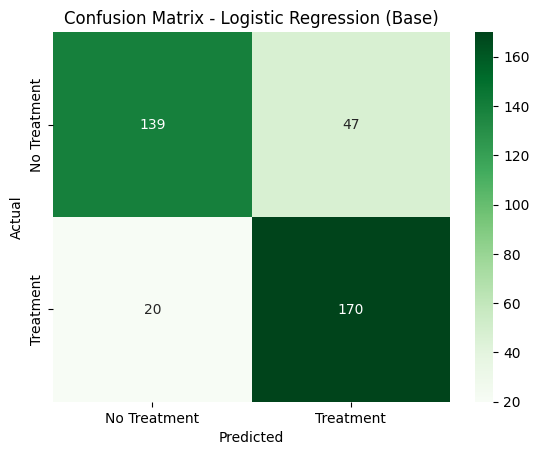

In [7]:


lr_predictions = lr_model.predict(X_test)
target_names = ['No Treatment', 'Treatment']

print("\nLogistic Regression:")
print(classification_report(y_test, lr_predictions, target_names=target_names))

cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Base)')
plt.show()

<h3>The precision, recall, and accuracy can be improved upon from this first attempt. We will need to work to improve this model.</h3>

In [8]:
print("\n--- Cross-Validation ---")

lr_cv_scores = cross_val_score(LogisticRegression(random_state=42, solver='liblinear'),
                                X_train, y_train, cv=5, scoring='accuracy')
print(f"\nLogistic Regression Cross-Validation Accuracy Scores: {lr_cv_scores}")
print(f"Logistic Regression Mean Cross-Validation Accuracy: {lr_cv_scores.mean():.4f}")


--- Cross-Validation ---

Logistic Regression Cross-Validation Accuracy Scores: [0.85142857 0.8        0.85714286 0.80571429 0.82285714]
Logistic Regression Mean Cross-Validation Accuracy: 0.8274


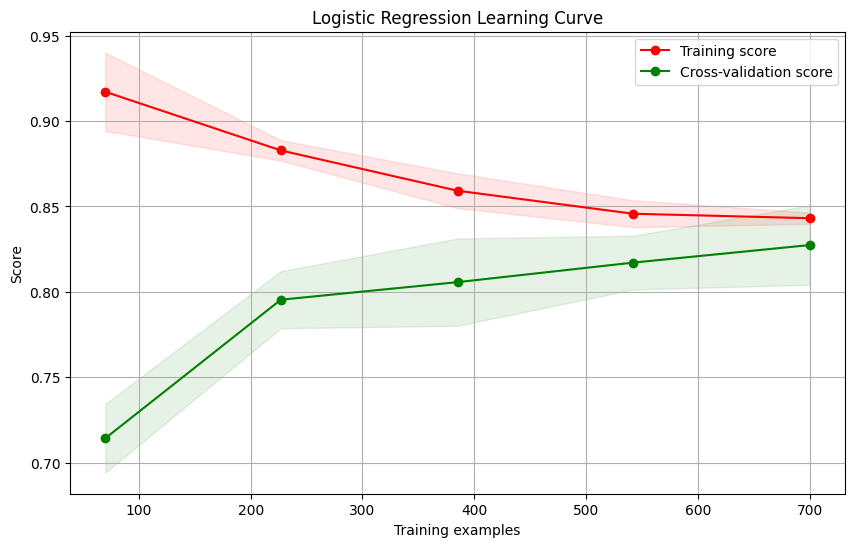

In [9]:
def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=None, scoring='accuracy'):
    plt.figure(figsize=(10, 6))

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

# Call for Logistic Regression only
plot_learning_curve(LogisticRegression(random_state=42, solver='liblinear'),
                    "Logistic Regression Learning Curve",
                    X_train, y_train, cv=5, scoring='accuracy')



<h3>The model is currently overfitting</h3>


--- Validation Curves ---


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


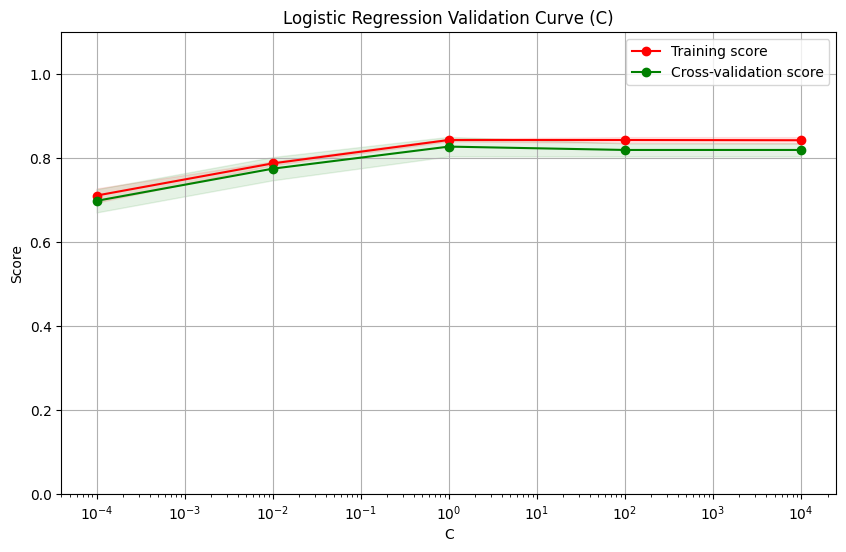

In [10]:
print("\n--- Validation Curves ---")

def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, scoring='accuracy'):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.semilogx(param_range, train_scores_mean, 'o-', label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.semilogx(param_range, test_scores_mean, 'o-', label="Cross-validation score", color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

param_range_lr = np.logspace(-4, 4, 5)
plot_validation_curve(LogisticRegression(random_state=42, solver='liblinear'),
                        "Logistic Regression Validation Curve (C)",
                        X_train, y_train,
                        param_name="C", param_range=param_range_lr, cv=5, scoring='accuracy')

In [11]:
print("\n--- Hyperparameter Tuning using Grid Search CV ---")
lr_param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42),
                               param_grid=lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

print("\nLogistic Regression Best Parameters:", lr_grid_search.best_params_)
lr_best_model = lr_grid_search.best_estimator_


--- Hyperparameter Tuning using Grid Search CV ---

Logistic Regression Best Parameters: {'C': np.float64(0.3593813663804626), 'penalty': 'l1', 'solver': 'liblinear'}



Logistic Regression (Tuned):
              precision    recall  f1-score   support

No Treatment       0.92      0.74      0.82       186
   Treatment       0.79      0.94      0.86       190

    accuracy                           0.84       376
   macro avg       0.85      0.84      0.84       376
weighted avg       0.85      0.84      0.84       376



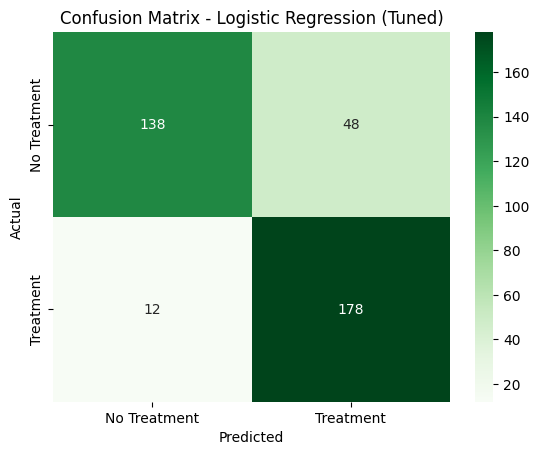

In [16]:
# Tuned Logistic Regression Model
lr_tuned_predictions = lr_best_model.predict(X_test)
print("\nLogistic Regression (Tuned):")
print(classification_report(y_test, lr_tuned_predictions, target_names=target_names))
cm_lr_tuned = confusion_matrix(y_test, lr_tuned_predictions)
sns.heatmap(cm_lr_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.show()

<h3>After taking a look at the learning curve and validation curves, we used Grid Search CV to find the best parameters for our model. Precision for "No Treatment" went from 87% to 92%. Recall for "Treatment" went from 89% to 94%, so it now does a better job of catching those who need treatment. Overall accuracy went from 82% to 84%. Recall for "No Treatment" Is still pretty rough and a weak point of this model. </h3>

In [18]:
y_pred = lr_best_model.predict(X_test)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1 Score (Macro):", round(f1_macro, 4))
print("F1 Score (Weighted):", round(f1_weighted, 4))

F1 Score (Macro): 0.8386
F1 Score (Weighted): 0.8388
